In [1]:
'''
Lab: Reading and Writing Files in Python
'''

'''
PART 1:
Read in drinks.csv
Store the header in a list called 'header'
Store the data in a list of lists called 'data'
Hint: you've already seen this code!
'''

import csv
with open('../data/drinks.csv', 'rU') as f:
    header = csv.reader(f).next()
    data = [row for row in csv.reader(f)]

    '''
PART 2:
Isolate the beer_servings column in a list of integers called 'beers'
Hint: you can use a list comprehension to do this in one line
Expected output:
    beers == [0, 89, ..., 32, 64]
    len(beers) == 193
'''
print header
beers = [row[1] for row in data]
print len(beers)

'''
PART 3:
Create separate lists of NA and EU beer servings: 'NA_beers', 'EU_beers'
Hint: you can use a list comprehension with a condition
Expected output:
    NA_beers == [102, 122, ..., 197, 249]
    len(NA_beers) == 23
    EU_beers == [89, 245, ..., 206, 219]
    len(EU_beers) == 45
'''
NA_beers = [row[1] for row in data if row[5] == "NA" ]
print len(NA_beers)
EU_beers = [row[1] for row in data if row[5] == "EU" ]
print len(EU_beers)

'''
PART 4:
Calculate the average NA and EU beer servings to 2 decimals: 'NA_avg', 'EU_avg'
Hint: don't forget about data types!
Expected output:
    NA_avg == 145.43
    EU_avg == 193.78
'''
def average_list(numList):
    sum = 0
    for num in numList:
        sum += float(num)
    average = sum/len(numList)
    return average

NA_avg = round( average_list(NA_beers), 2)
print NA_avg
EU_avg = round( average_list(EU_beers), 2)
print EU_avg

'''
PART 5:
Write a CSV file called 'avg_beer.csv' with two columns and three rows.
The first row is the column headers: 'continent', 'avg_beer'
The second and third rows contain the NA and EU values.
Hint: think about what data structure will make this easy
Expected output (in the actual file):
    continent,avg_beer
    NA,145.43
    EU,193.78
'''
avg_beer = {}
#avg_beer["continent"] = "avg_beer"
avg_beer["NA"] = NA_avg
avg_beer["EU"] = EU_avg

#dict.keys()

with open('avg_beer.csv', 'wb') as f:
    f.write("continent,avg_beer" + '\n')
    for key in avg_beer.keys():
        f.write(str(key) + "," + str(avg_beer[key]) + '\n')
        

['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'continent']
193
23
45
145.43
193.78


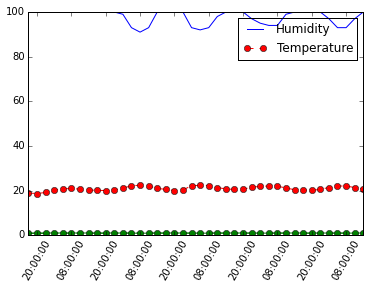

In [3]:
'''
Part 6:
import requests # a module for reading the web
api_endpoint = 'http://api.openweathermap.org/data/2.5/forecast/city'
params = {}
params['id'] = '745044'
params['units'] = 'metric'
params['APPID'] = '80575a3090bddc3ce9f363d40cee36c2'
request = requests.get(api_endpoint, params = params)
'''

import requests # a module for reading the web
api_endpoint = 'http://api.openweathermap.org/data/2.5/forecast/city'
params = {}
params['id'] = '745044'
params['units'] = 'metric'
params['APPID'] = '80575a3090bddc3ce9f363d40cee36c2'
request = requests.get(api_endpoint, params = params)

# parse out the json from this request
data = request.json()

# Let's inspect by using the keys method of dictionaries
weather_data = data['list']

#weather_data = data['list']
temperatures = [data_point['main']['temp'] for data_point in weather_data]
humidity = [data_point['main']['humidity'] for data_point in weather_data]
dates = [data_point['dt'] for data_point in weather_data]

from datetime import datetime
dates = [datetime.fromtimestamp(epoch) for epoch in dates]

import matplotlib.pyplot as plt
%matplotlib inline

# Plot two things at once!

humidity = [data_point['main']['humidity'] for data_point in weather_data]

plt.legend()                                # Create a legend
plt.plot(dates, humidity, label='Humidity')
plt.plot(dates, temperatures, marker='o', linestyle='--', color='r', label='Temperature')

temperatures_normalized = [float(t) / max(temperatures) for t in temperatures]
humidity_normalized = [float(h) / max(humidity) for h in humidity]

humidity = [data_point['main']['humidity'] for data_point in weather_data]

temperatures_normalized = [float(t) / max(temperatures) for t in temperatures]
humidity_normalized = [float(h) / max(humidity) for h in humidity]

plt.legend()
ocs, labels = plt.xticks()                 # get the x tick marks
plt.setp(labels, rotation=60)               # rotate the x ticks marks by 60 degrees
plt.plot(dates, humidity_normalized, label='Humidity')
plt.plot(dates, temperatures_normalized, marker='o', linestyle='--', color='g', label='Temperature')

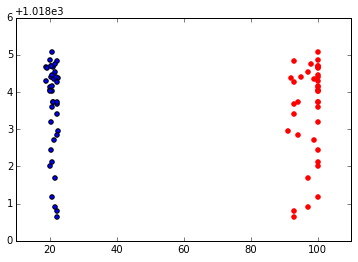

In [4]:
'''
Part 7
Create a list of the pressure measurements and plot it against dates
'''
pressure = [data_point['main']['pressure'] for data_point in weather_data]
pressures_normalized = [float(t) / max(pressure) for t in pressure]


'''
Part 8
Make a scatter plot plotting pressure against temperature and humidity
'''
plt.scatter(temperatures, pressure)
plt.scatter(humidity, pressure, color='r')

In [55]:
'''
BONUS:
Learn csv.DictReader() and use it to redo Parts 1, 2, and 3.
'''
import csv
csv_file = '../data/drinks.csv'

'''
PART 1:
Read in drinks.csv
Store the header in a list called 'header'
Store the data in a list of lists called 'data'
Hint: you've already seen this code!
'''
with open(csv_file) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)



In [70]:
'''
PART 2:
Isolate the beer_servings column in a list of integers called 'beers'
Hint: you can use a list comprehension to do this in one line
Expected output:
    beers == [0, 89, ..., 32, 64]
    len(beers) == 193
'''
import csv
import sys
csv_file = '../data/drinks.csv'
Beer_List = []
with open(csv_file) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        Beer_List.append(row['country'])

#print beers
print len(Beer_List)



193


"\nPART 3:\nCreate separate lists of NA and EU beer servings: 'NA_beers', 'EU_beers'\nHint: you can use a list comprehension with a condition\nExpected output:\n    NA_beers == [102, 122, ..., 197, 249]\n    len(NA_beers) == 23\n    EU_beers == [89, 245, ..., 206, 219]\n    len(EU_beers) == 45\n"

In [72]:
'''
PART 3:
Create separate lists of NA and EU beer servings: 'NA_beers', 'EU_beers'
Hint: you can use a list comprehension with a condition
Expected output:
    NA_beers == [102, 122, ..., 197, 249]
    len(NA_beers) == 23
    EU_beers == [89, 245, ..., 206, 219]
    len(EU_beers) == 45
'''
import csv
import sys
csv_file = '../data/drinks.csv'
NA_beer = []
EU_beer = []
with open(csv_file) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['continent'] == 'NA':
            NA_beer.append(row['country'])
        if row['continent'] == 'EU':
            EU_beer.append(row['country'])

print len(NA_beer)
print len(EU_beer)

23
45
